<a href="https://colab.research.google.com/github/MiloCocoa/boston-house-price/blob/main/regressionHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Note: I'm extremely new to the topic hence a lot of my work below will be refering to others' work as guidelines to help me throughout the process. In addition, I'll be making a few notes to myself throughout the notebook for my own learning purposes/review. Hopefully they are correct since my understanding may be limited.

# Loading Data

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from pandas import read_csv

Mounted at /content/drive


Imported some libraries for data processing.

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Above is the first five rows of each columns (head)

In [73]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Here the data is imported locally, above it is importing it from drive. Choose either; whichever is more appropriate/convenient

# Data Description

We get the dimension and the common metrics of each column.

From the Column name alone, it's difficult to know what they mean.
According to 'https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html', each column means:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

From 'https://rstudio-pubs-static.s3.amazonaws.com/91640_0229aaabe3af464fb849a031e79a66b0.html' MEDV is a response value to the other 13 values, hence the goal could be to predict MEDV using the other 13 variables through regression.

In [ ]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Since there's no null values in the dataset (no missing value) hence no need to make adjustment concerning missing data.

In [74]:
print(np.shape(data))
data.describe()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Since ZN and CHAS are conditional/categorical data, it may not be a useful metric for regression tasks hence we should ignore them. ('Regression tasks involves prediction of continuous variable' from 'https://www.sciencedirect.com/science/article/abs/pii/B9780323917766000099#:~:text=Regression%20task%20in%20machine%20learning,the%20set%20of%20independent%20variables.')

Also, since MEDV seems to be censored at $50k or above according to https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html, data above 50 may not be useful.

# Observation, Analysis, Processing

14


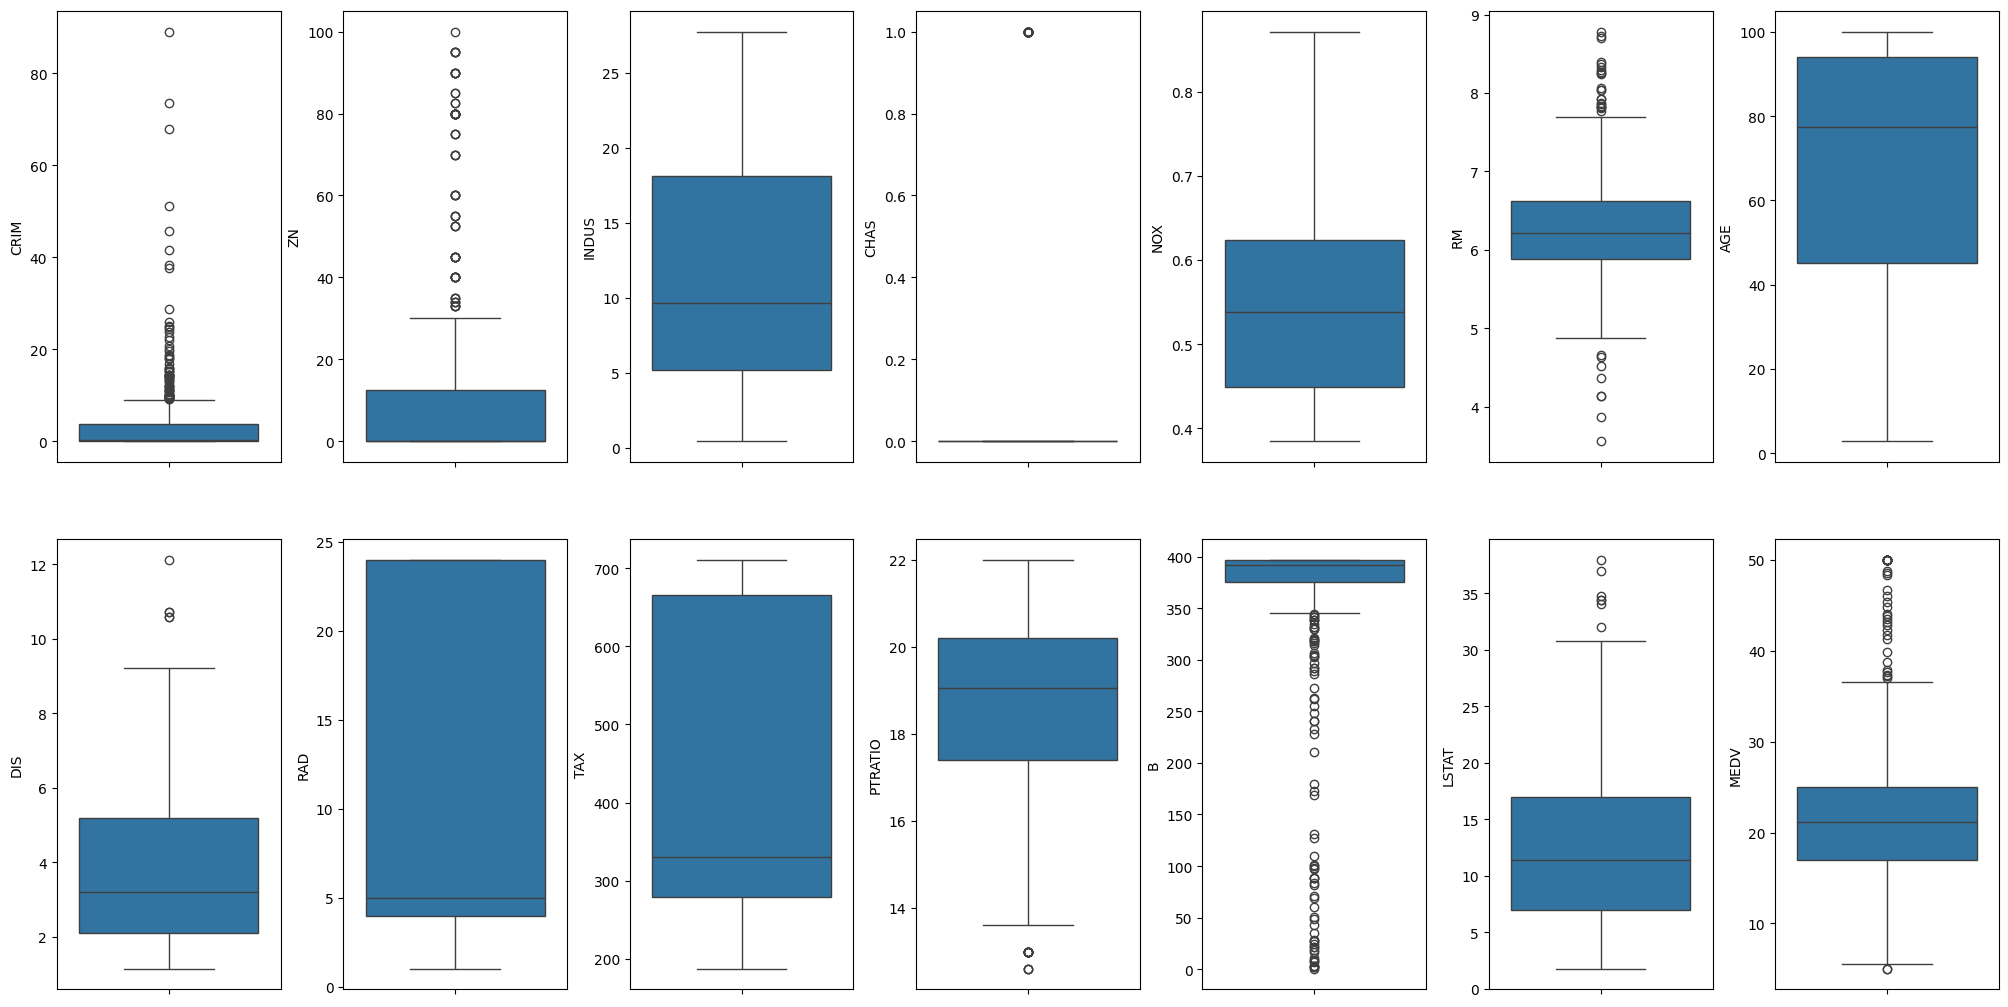

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10)) # 14 boxplots subplots on central figure and dimensions of the figure
index = 0
axs = axs.flatten() # make into list of axes obj with index
for k,v in data.items(): # loop through dict of data
    sns.boxplot(y = k, data = data, ax = axs[index]) # vertical var of each subplot boxplot = key (k), dataset in each subplot = data (dict), ax is the axes obj from matplotlib
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) #plot layout

From the plot I observe that there are a lot of outliers in CRIM, ZN, RM, and B.
Let's look at the outlier percentage.

In [ ]:
for k, v in data.items():
        q1 = v.quantile(0.25) # 1stQ
        q3 = v.quantile(0.75) # 3rdQ
        irq = q3 - q1 # interquartile range
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)] # v_col include all data outside the range (q1-1.5irq to q3+1.5irq)
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0] # percentage of v_col over all data v
        print("Column %s outliers = %.2f%%" % (k, perc)) # k = key e.g. CHAS, NOX


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Since a MEDV is censored above 50.00 we are removing all of them to not skew the data that will be used.

In [ ]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


Distribution of all the different columns, plus MEDV

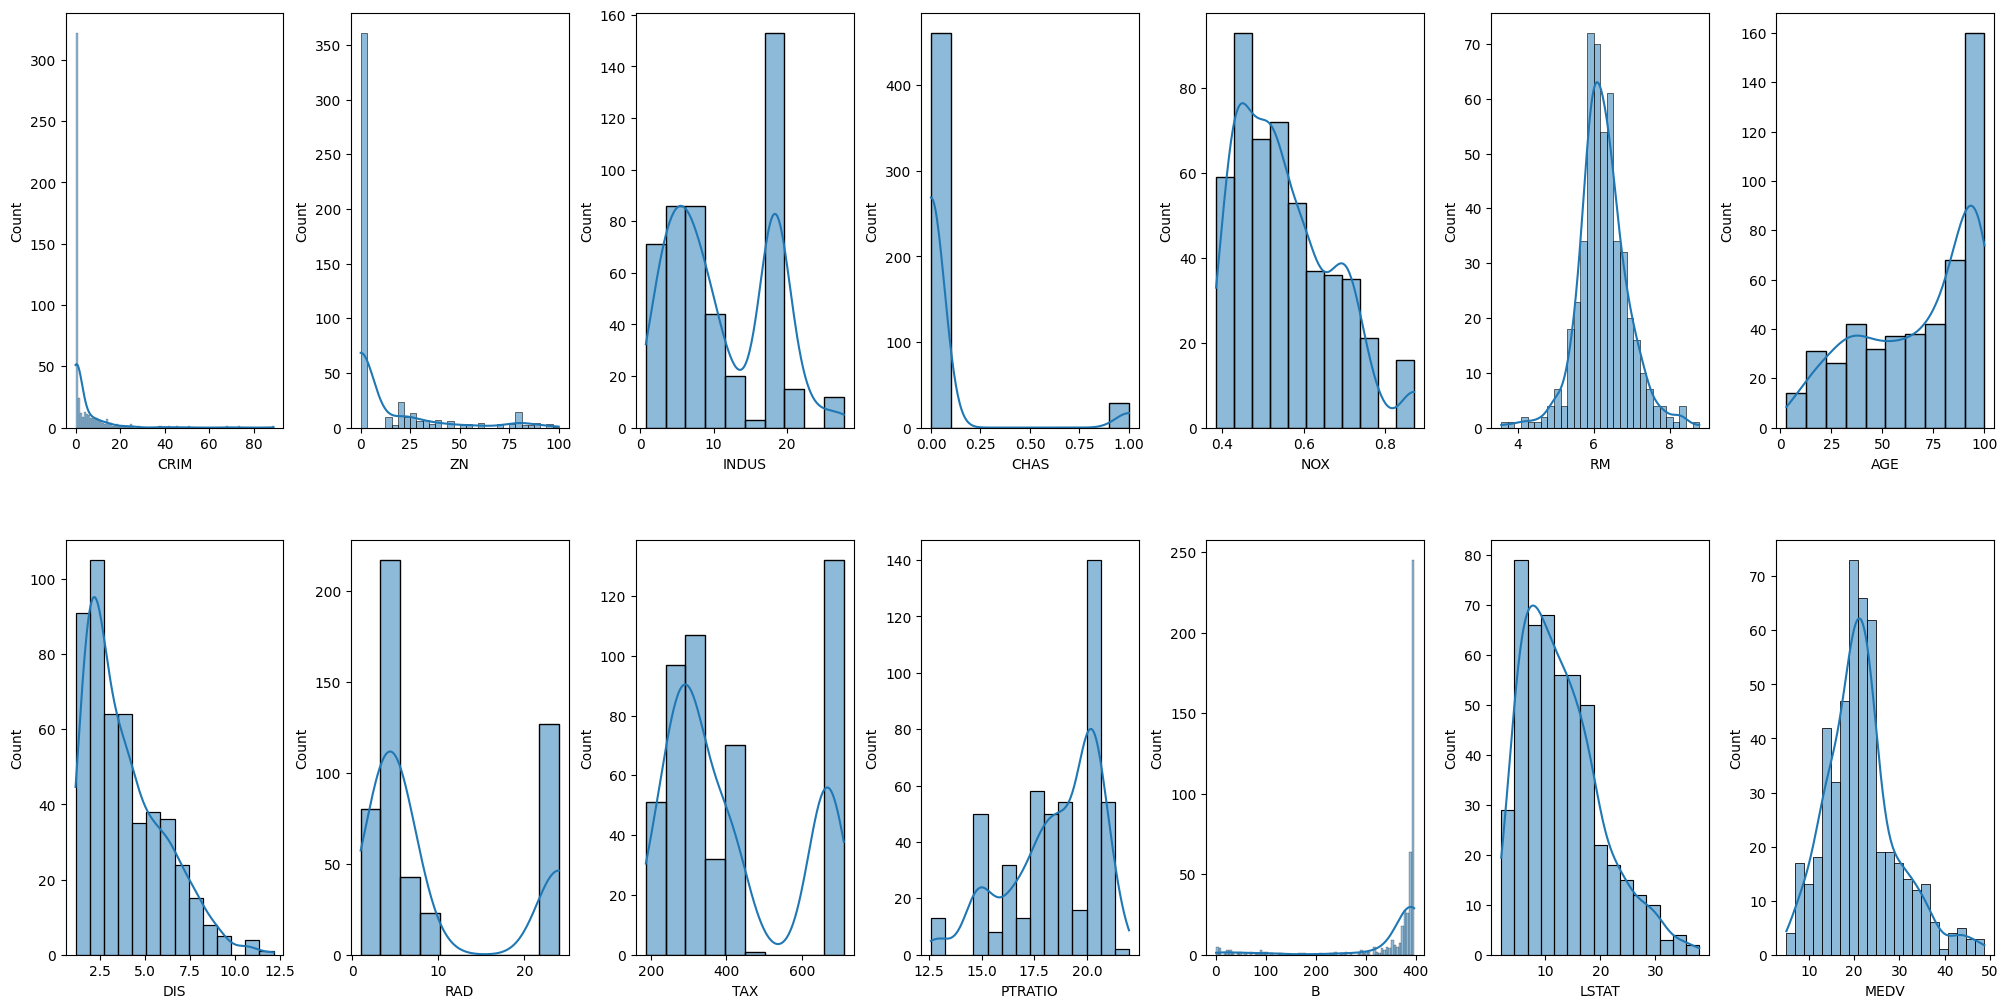

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10)) # configuration for the figure and axes object containing necessary parameters plotting
index = 0
axs = axs.flatten() # convert to list of to go through via index
for k,v in data.items():
    sns.histplot(v, ax=axs[index], kde=True) # histogram plot with vertical column v, axes obj ax = axs[index] from axs.flatten(), kde=True to show the kernel density estimation
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) # configure the edges and the figure and the gaps between each subplots

Pairplot next.

<Axes: >

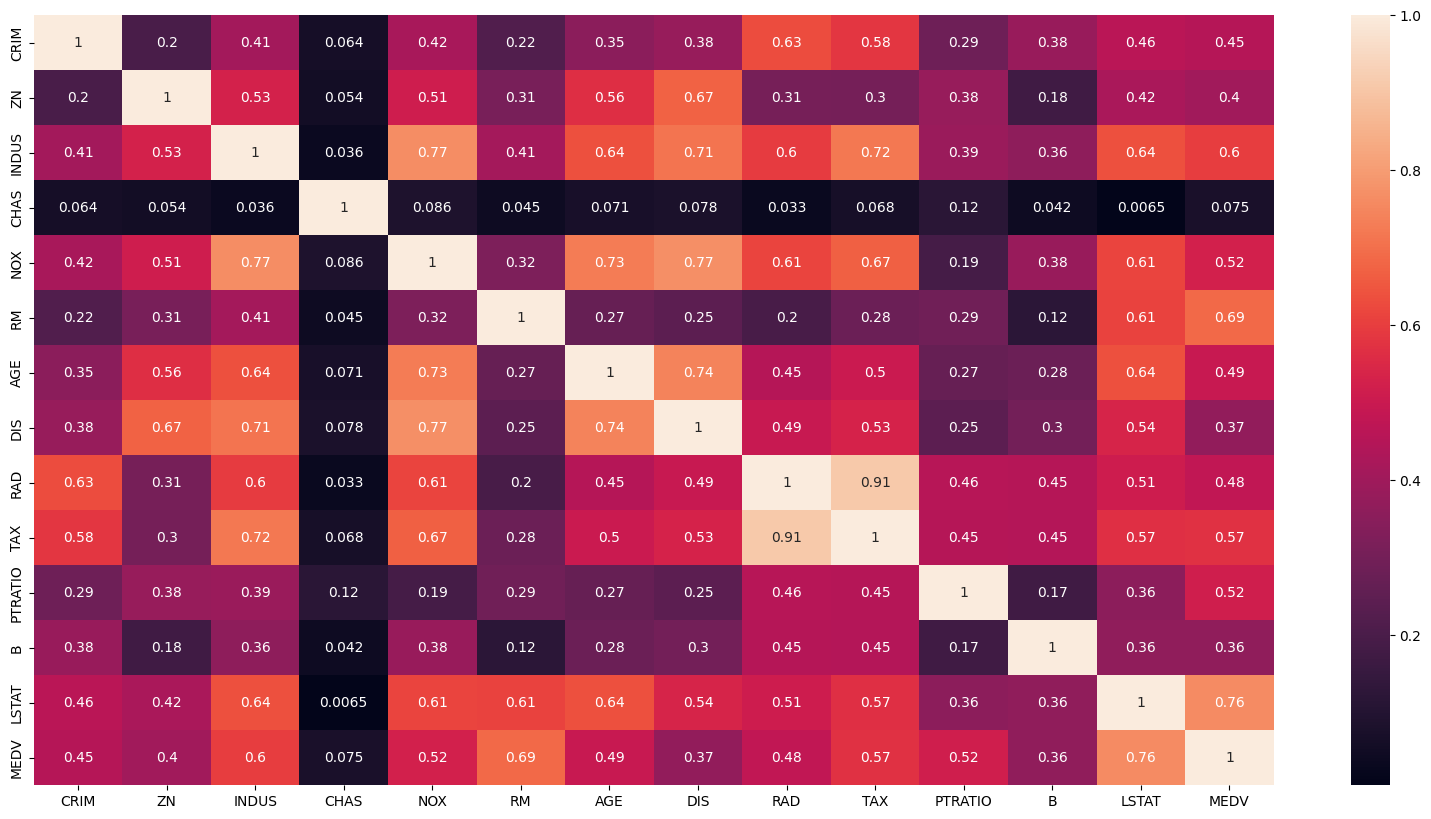

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

I observe that a few columns have a correlation score above 1/2 which are 'INDUS', 'NOX', 'RM', TAX', 'PTRATIO', 'LSTAT'. Also, 'TAX' and 'RAD' seems to have very high correlation between each other.

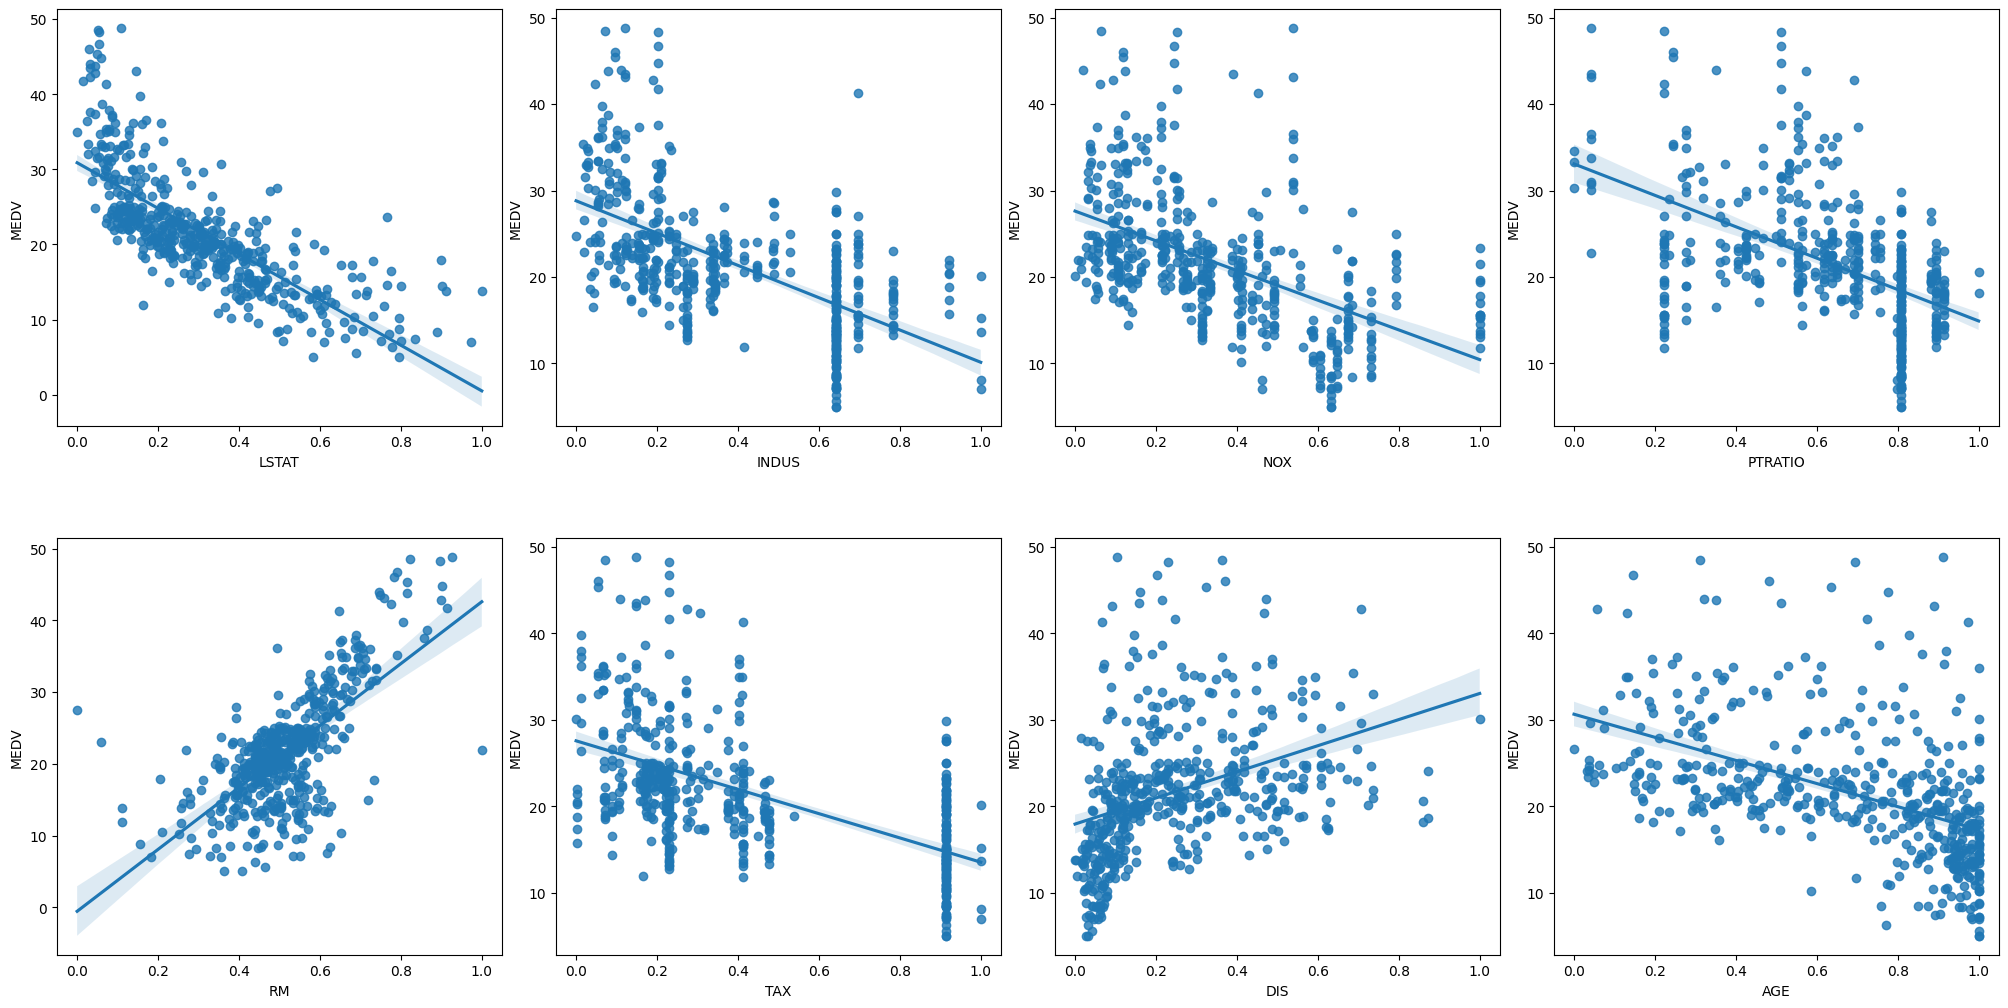

In [ ]:
from sklearn import preprocessing # machine learning language library
# Scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler() # scaling for the columns
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'] # columns used are not skewed like CRIM, ZN, or B, or Categorical like CHAS
x = data.loc[:,column_sels] # horizontal axis of each subplot; data.loc[] access a group of row and column by [rows, column]; in this case the ':' represents all column, and column_sels are highlighted above
y = data['MEDV'] # vertical for all supblot
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels) # transform the x and y (rows and column) to scale against each other correctly
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10)) # figure configuration for the combination of all the subplots, and an axes obj for each subplot
index = 0
axs = axs.flatten() # transform to list type
for i, k in enumerate(column_sels): # i represents int index, and k is the corresponding column in column_sels
    sns.regplot(y=y, x=x[k], ax=axs[i]) # seaborn regplot--plot data and a linear regression fit; y = vertical element which is data from MEDV; x is horizontal element from each of the columns in column_sels; ax as axes obj
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) # layout config

To remove some skewness I do log transformation

In [ ]:
y =  np.log1p(y) # Calculates log(1 + x)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3: # skewness is a measure of the asymmetry
        x[col] = np.log1p(x[col]) # do log transformation on x with absolute(skewness) over 0.3

# Regression Models

Let's try Linear, Ridge Regression on dataset first.

Linear regression is simple and straight forward. It creates the best fit line for two variables. However, it falls short when it comes to datasets that are not uniformly distributed, where a lot of plots are bunched together, which can skew the overall estimation. It also isn't great at accounting for outliers and is limited to only two variables.

Ridge regression is

In [52]:
from sklearn import datasets, linear_model # machine learning library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

mse_scores_map = {} # create score map to track performance of the different regression methods
mae_scores_map = {} # mean absolute error score map
rmse_scores_map = {} # root mean square error score map
r2_scores_map = {} # r-squared score map

l_regression = linear_model.LinearRegression() # ordinary least squares linear regression
kf = KFold(n_splits=10) # splits data in to k-folds used for training and testing; each fold is used for testing, where the k - 1 others are for training
min_max_scaler = preprocessing.MinMaxScaler() # scaling features into a range 0 to 1 so that units and the intrinsic nature of the value of the data does not affect calculations
x_scaled = min_max_scaler.fit_transform(x) # scaled x -- x is scaled to be in range 0 to 1
# for below: score for evaluating an estimator's performance through 'cross validation score'; y is the MEDV, cv (splitting strat) = kf (k-fold); and scoring method is commented above
print("Linear Regression")
# MSE
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_map['LinearRegression'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())) # print mean score for all test folds, standard deviation of score for all test folds
# MAE
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['LinearRegression'] = scores
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['LinearRegression'] = scores
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['LinearRegression'] = scores
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Ridge regression specifically corrects for multicollinearity in regression analysis.
l_ridge = linear_model.Ridge()
# multicollinearity in regression analysis refers to when two independent variable are themselves correlated; in this case TAX and RAD are suspiscious
print("Ridge Regression")
# MSE
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error') # scoring by mean squared error
mse_scores_map['Ridge'] = scores # add score into the dict 'mse_scores_map'
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())) # print out score and standard deviation
# MAE
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['Ridge'] = scores # add score into the dict 'mse_scores_map'
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['Ridge'] = scores # add score into the dict 'mse_scores_map'
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['Ridge'] = scores # add score into the dict 'mse_scores_map'
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2(similar to ridge) with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
print("Polynomial Regression")
# MSE
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# MAE
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['PolyRidge'] = scores
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['PolyRidge'] = scores
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['PolyRidge'] = scores
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Linear Regression
MSE: -0.04 (+/- 0.04)
MAE: -0.15 (+/- 0.07)
RMSE: -0.18 (+/- 0.08)
R2: 0.45 (+/- 0.27)
Ridge Regression
MSE: -0.04 (+/- 0.04)
MAE: -0.15 (+/- 0.06)
RMSE: -0.18 (+/- 0.08)
R2: 0.46 (+/- 0.26)
Polynomial Regression
MSE: -0.03 (+/- 0.03)
MAE: -0.14 (+/- 0.05)
RMSE: -0.17 (+/- 0.07)
R2: 0.50 (+/- 0.24)


Since there isn't much difference to the mean squared error with or without L2 regularization. Though Polynomial regression does have a lower MSE score.

Let's try some other regression techniques. (nonparametric ones)

Nonparametric regression is a category of regression analysis in which the predictor does not take a predetermined form but is constructed according to information derived from the data. That is, no parametric form is assumed for the relationship between predictors and dependent variable. (souce: wikipedia)

SVR with kernel rbf

Support vector regression (SVR)

    It is different from traditional linear regression methods as it finds a
    hyperplane that best fits the data points in a continuous
    space, instead of fitting a line to the data points.

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.1) # 'rbf' is radial basis function which is default, C is inversely proportional to the strength of regularization, gamma is the coefficient used for kernel function
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("Support vector regression")
# MSE
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# MAE
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['SVR'] = scores
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['SVR'] = scores
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['SVR'] = scores
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Support vector regression
MSE: -0.04 (+/- 0.03)
MAE: -0.15 (+/- 0.06)
RMSE: -0.19 (+/- 0.07)
R2: 0.43 (+/- 0.21)


In [59]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("Decision Tree Regression")
# MSE
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# MAE
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['DecisionTreeRegressor'] = scores
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['DecisionTreeRegressor'] = scores
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['DecisionTreeRegressor'] = scores
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Decision Tree Regression
MSE: -0.05 (+/- 0.04)
MAE: -0.16 (+/- 0.06)
RMSE: -0.21 (+/- 0.08)
R2: 0.25 (+/- 0.49)


In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("K-Neighbors Regression")
# MSE
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_map['KNeighborsRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# MAE
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['KNeighborsRegressor'] = scores
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['KNeighborsRegressor'] = scores
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['KNeighborsRegressor'] = scores
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

K-Neighbors Regression
MSE: -0.04 (+/- 0.02)
MAE: -0.16 (+/- 0.05)
RMSE: -0.20 (+/- 0.06)
R2: 0.32 (+/- 0.27)


Comparing the three models chosen through grid search, SVR performs best.

GridSearchCV

    Grid search cross-validation searches best fit hyperparameters for the regression method


And finally an ensemble method

    This estimator builds an additive model in a forward stage-wise fashion; it allows for the optimization of
    arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient
    of the given loss function.

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("Gradient Boosting Regression")
# MSE
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# MAE
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mae_scores_map['GradientBoostingRegressor'] = scores
print("MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# RMSE
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
rmse_scores_map['GradientBoostingRegressor'] = scores
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
# R2
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='r2')
r2_scores_map['GradientBoostingRegressor'] = scores
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Gradient Boosting Regression
MSE: -0.03 (+/- 0.02)
MAE: -0.12 (+/- 0.05)
RMSE: -0.16 (+/- 0.06)
R2: 0.59 (+/- 0.19)


# Final Plot & Conclusion


Now plot the resulting scores for all the regression methods.


<Axes: >

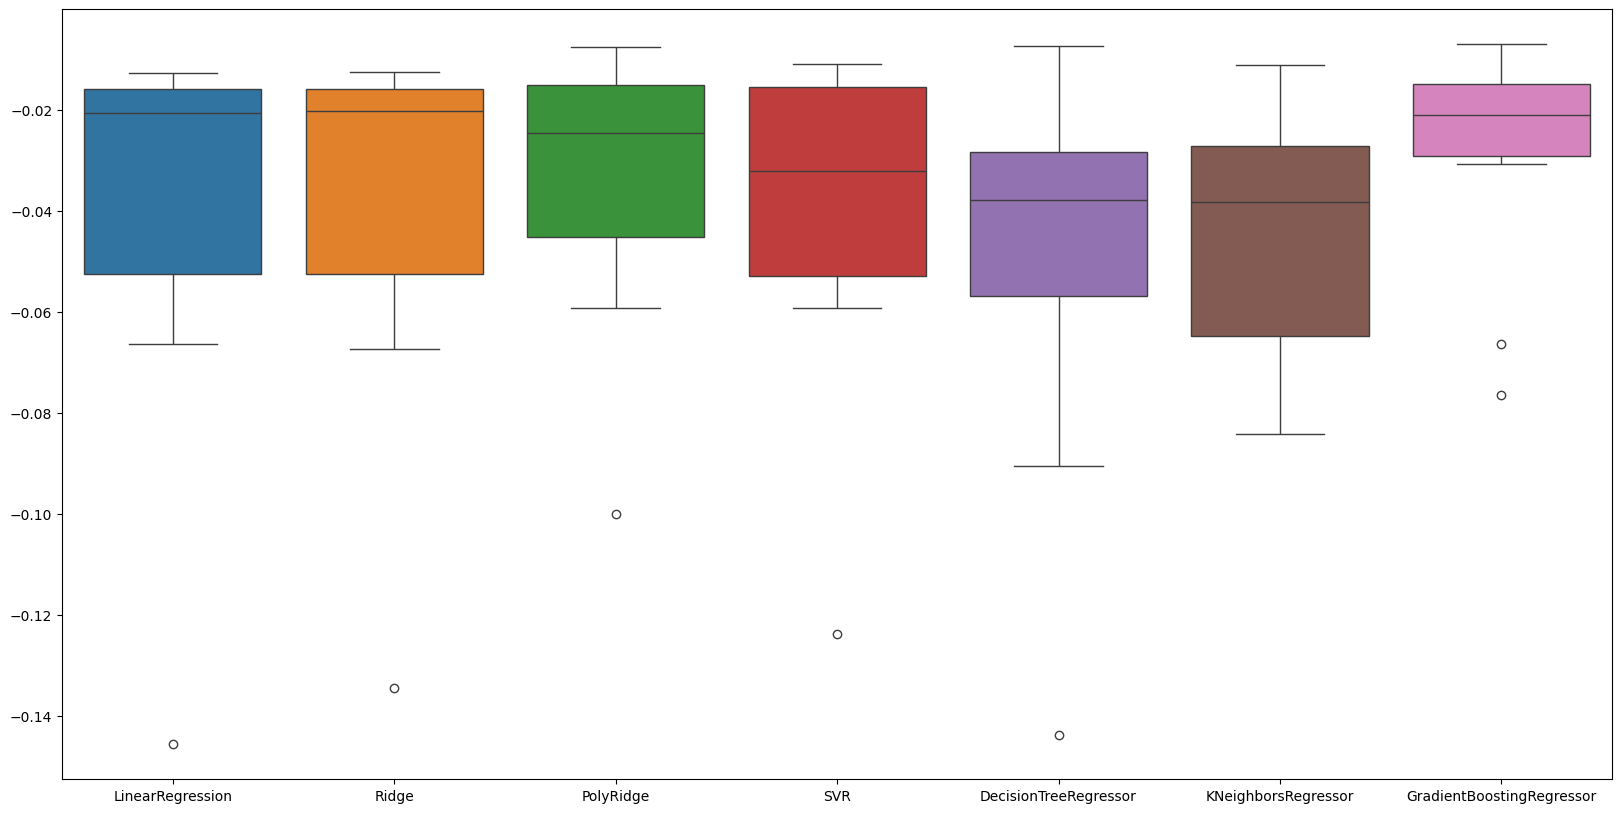

In [68]:
plt.figure(figsize=(20, 10))
mse_scores_map = pd.DataFrame(mse_scores_map)
sns.boxplot(data=mse_scores_map)

<Axes: >

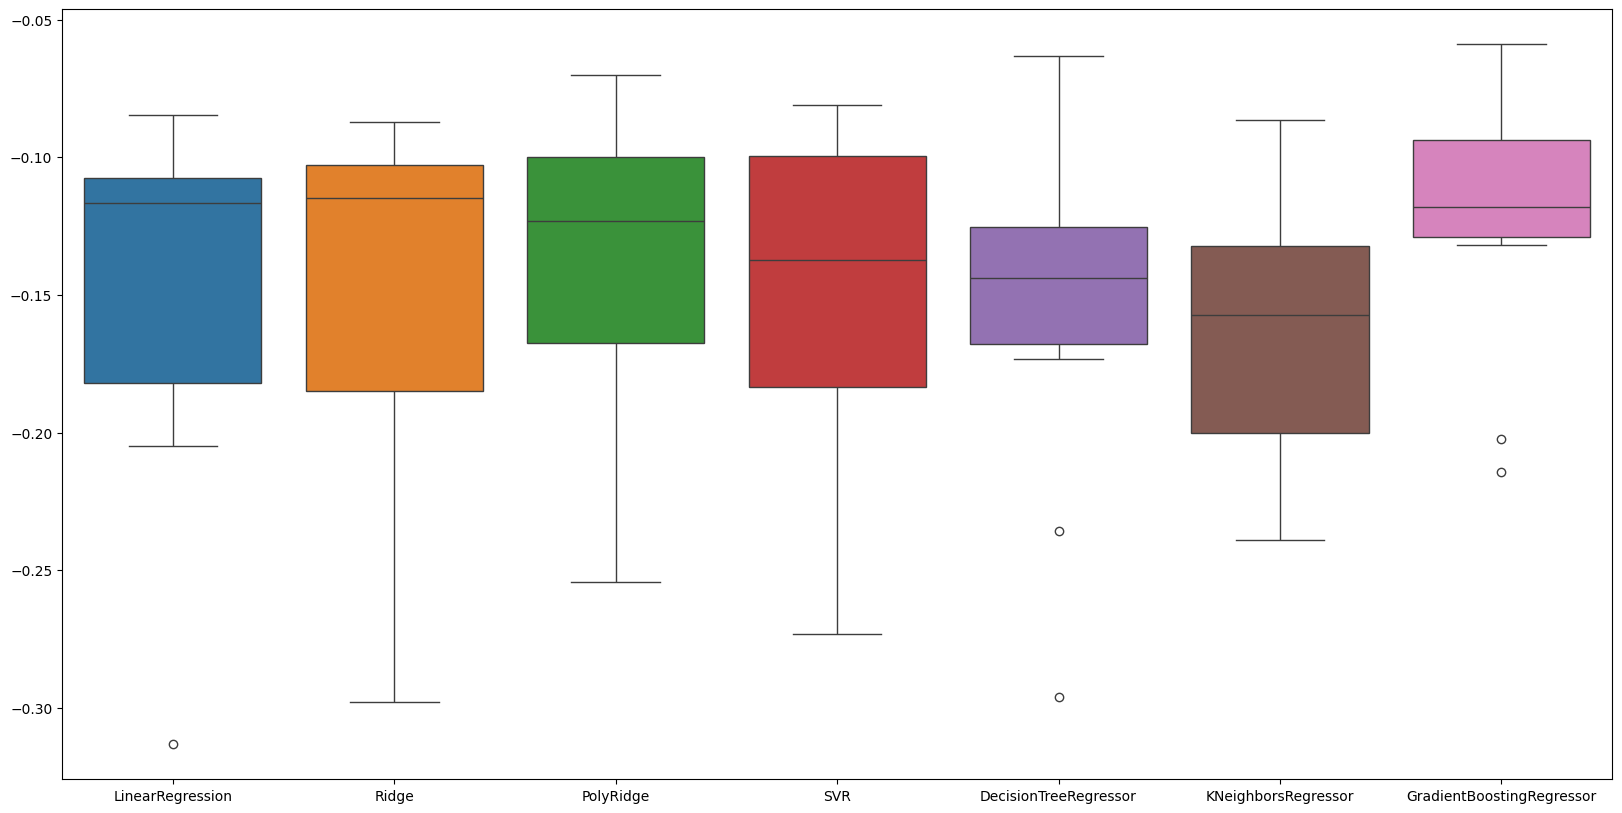

In [69]:
plt.figure(figsize=(20, 10))
mae_scores_map = pd.DataFrame(mae_scores_map)
sns.boxplot(data=mae_scores_map)

<Axes: >

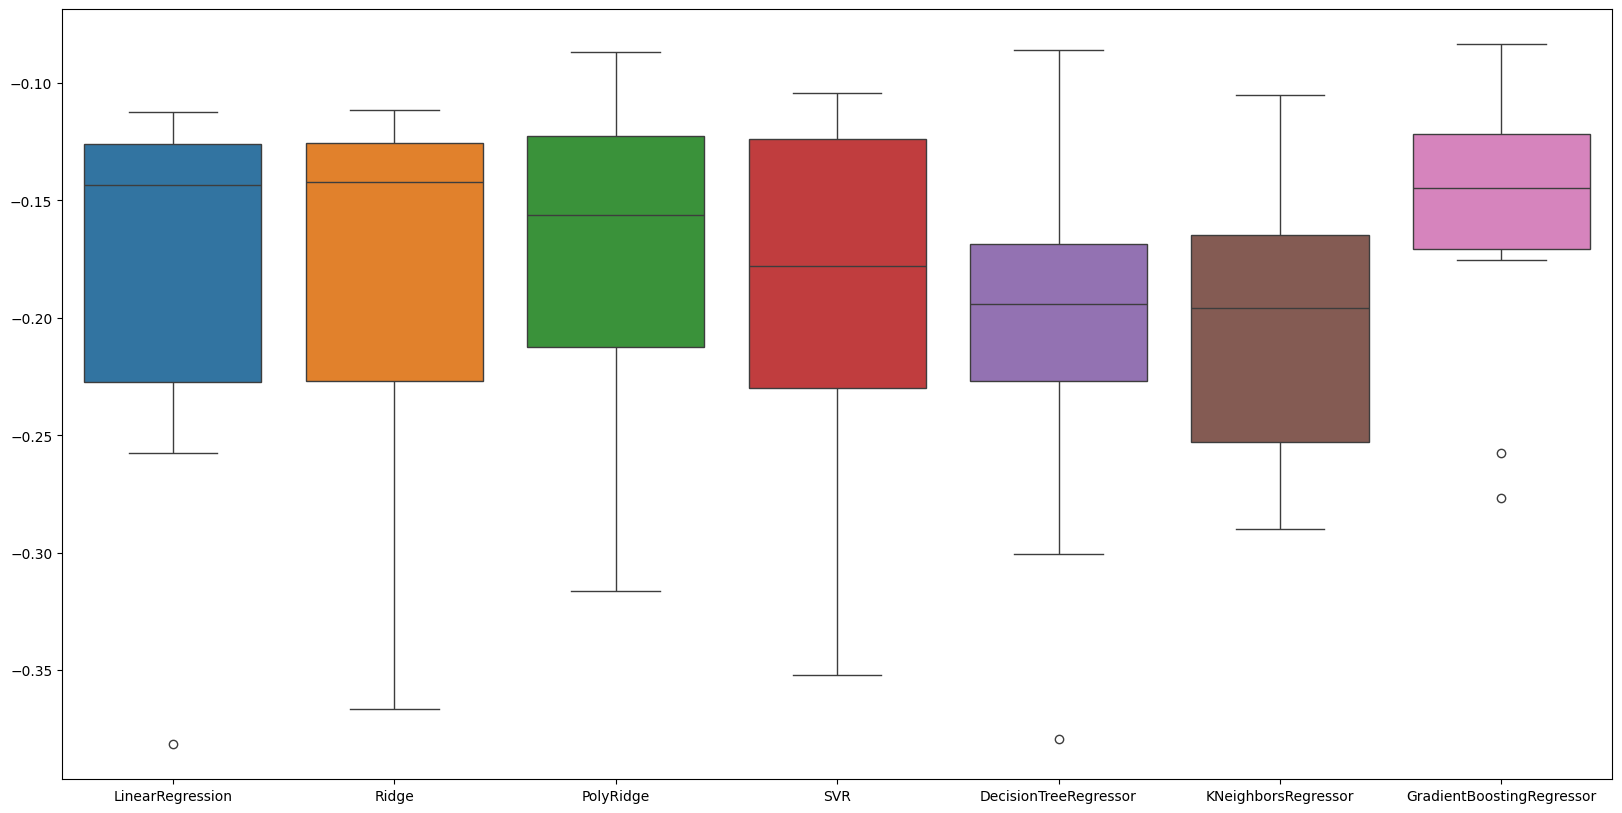

In [71]:
plt.figure(figsize=(20, 10))
rmse_scores_map = pd.DataFrame(rmse_scores_map)
sns.boxplot(data=rmse_scores_map)

<Axes: >

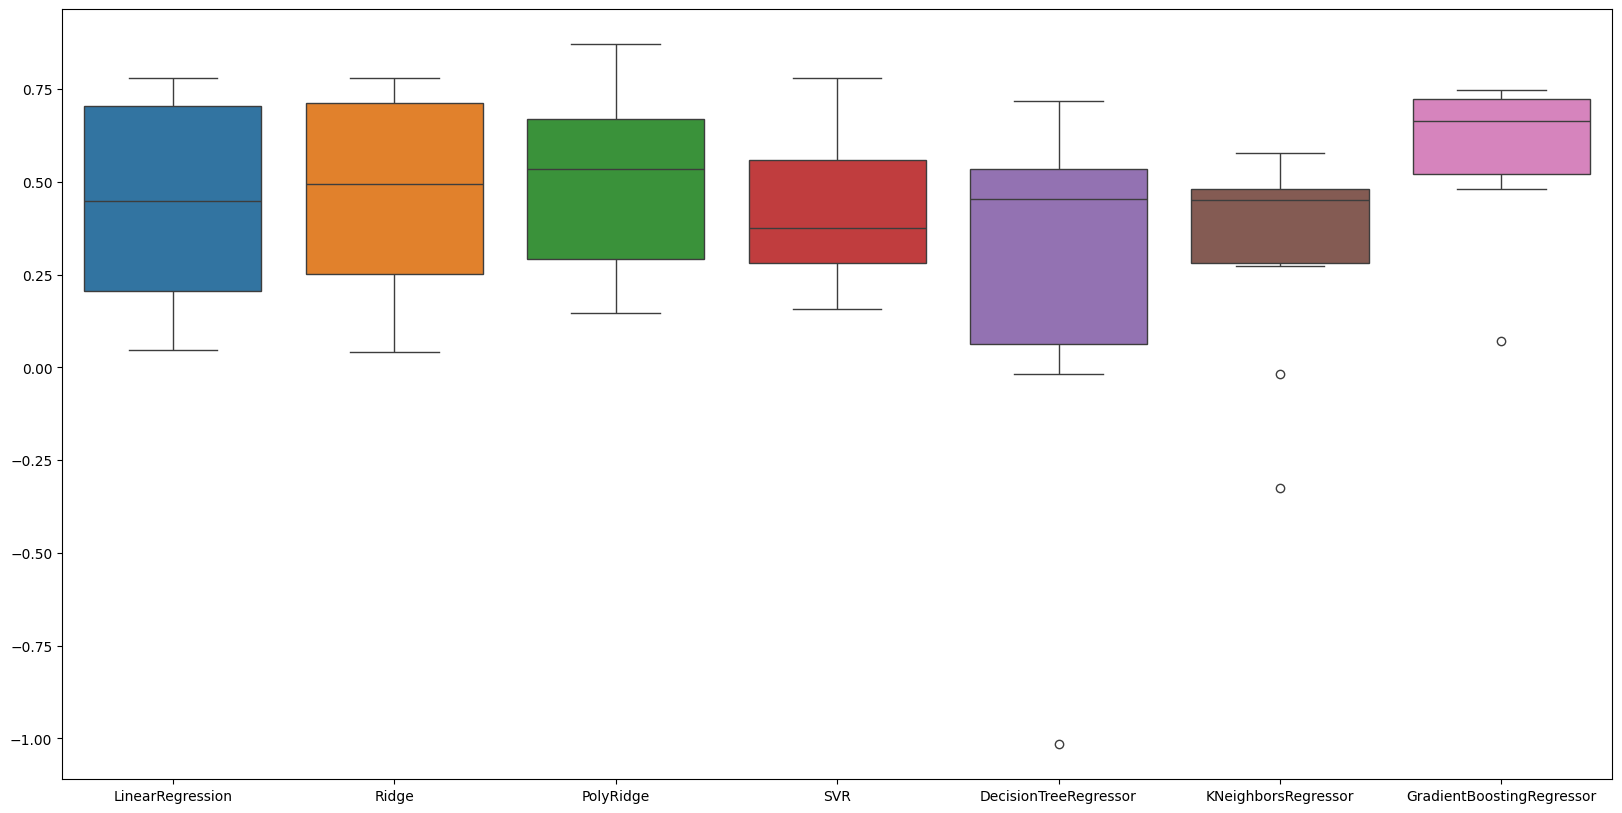

In [72]:
plt.figure(figsize=(20, 10))
r2_scores_map = pd.DataFrame(r2_scores_map)
sns.boxplot(data=r2_scores_map)

In [81]:
print("Mean Squared Error-------------------------")
print(mse_scores_map.mean())
print("Mean Absolute Error------------------------")
print(mae_scores_map.mean())
print("Root Mean Square Error---------------------")
print(rmse_scores_map.mean())
print("R-Squared----------------------------------")
print(r2_scores_map.mean())

Mean Squared Error-------------------------
LinearRegression            -0.040343
Ridge                       -0.039011
PolyRidge                   -0.034219
SVR                         -0.040945
DecisionTreeRegressor       -0.049824
KNeighborsRegressor         -0.044644
GradientBoostingRegressor   -0.028869
dtype: float64
Mean Absolute Error------------------------
LinearRegression            -0.147833
Ridge                       -0.146602
PolyRidge                   -0.137205
SVR                         -0.147575
DecisionTreeRegressor       -0.156743
KNeighborsRegressor         -0.162826
GradientBoostingRegressor   -0.124131
dtype: float64
Root Mean Square Error---------------------
LinearRegression            -0.183447
Ridge                       -0.180967
PolyRidge                   -0.171947
SVR                         -0.188439
DecisionTreeRegressor       -0.207104
KNeighborsRegressor         -0.202801
GradientBoostingRegressor   -0.159278
dtype: float64
R-Squared----------------

From the plot, GradientBoostingRegressor seems to show best result as an estimator. In addition, the mean scores from the K-Fold test/train split shown suggests the same story.